# Bibliometric Analysis Python Script

This script will help you to do your bibliometric analysis research, but not necessary all of the bibliometric analysis techniques. To know all of the methods you can refer to the following [Paper](https://www.sciencedirect.com/science/article/pii/S0148296321003155?via%3Dihub).
<br>
On this script we will be taking a look at a couple of bibliometric analysis techniques which is as follows:
- Total Publication per Year
- Document Type Distribution
- Top 10 Contributing Authors
- Top 10 Keywords

<br>

**Requirements**

Before you continue, there is a couple of data that you need to have before using this script. The data is as follows:
- RIS file of the dataset that will be used in this script
- VosViewer Map File, that will be discussed later

<br>

Please note that your file name is the same as in the script, or you can change the file name on the script to match your file name, to do this please watch for "# Replace this to the name of your file" on the script

<br>

To begin your journey, you can do a trial run of the script using the data that is available on [Github](https://github.com/MJTheo/Bibliometric_Analysis.git)

<br>

This script hopefully will be useful to help you on your journey to conduct Bibliometric Analysis research.

Best Regards,<br>Authors

## **Install Library**

This script will install all the necessary library that will be used on the following script
- Pandas: To work with the your dataset
- Matplotlib & Seaborn: To create a graph
- Rispy: To read RIS dataset

In [1]:
pip install pandas matplotlib seaborn rispy

## **Preprocessing Data**

The following script will be used to preprocess the data before it can be used on the analysis, such as removing any duplicate document from the dataset and to make sure the document type will be the same.

### **Remove Duplicate**

Use this script to delete any duplicate document that you have so that it will leave only the unique document to be used in the analysis. This will also help to increase the accuracy of the research.

In [2]:
import rispy
import pandas as pd

# Load RIS data
def load_ris_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        entries = rispy.load(f)
    return entries

# Convert RIS data to DataFrame
def convert_to_dataframe(entries):
    data = {
        'Title': [entry.get('title', '') for entry in entries],
        'DOI': [entry.get('doi', '') for entry in entries],
        'Authors': [entry.get('authors', []) for entry in entries],
        'Year': [entry.get('year', '') for entry in entries]
    }
    df = pd.DataFrame(data)
    return df

# Remove duplicate documents based on title or DOI
def remove_duplicates(df):
    # Count documents before removing duplicates
    initial_count = len(df)

    # Drop duplicates based on Title and DOI, keeping the first occurrence
    df_unique = df.drop_duplicates(subset=['Title', 'DOI'], keep='first')

    # Count documents after removing duplicates
    final_count = len(df_unique)

    return df_unique, initial_count, final_count

# Save the cleaned data back to a new RIS file
def save_to_ris(df, original_entries, output_path):
    # Map the deduplicated DataFrame back to the original RIS entries
    unique_entries = [entry for entry in original_entries if entry.get('title', '') in df['Title'].values]
    with open(output_path, 'w', encoding='utf-8') as f:
        rispy.dump(unique_entries, f)

# Load data
file_path = 'data.ris' # Replace this to the name of your file
output_path = 'nonduplicate_data.ris'
entries = load_ris_data(file_path)
df = convert_to_dataframe(entries)

# Remove duplicates and get counts
df_unique, initial_count, final_count = remove_duplicates(df)

# Display counts
print("Number of documents before removing duplicates:", initial_count)
print("Number of documents after removing duplicates:", final_count)

# Save the deduplicated data
save_to_ris(df_unique, entries, output_path)
print(f"Deduplicated RIS file saved to: {output_path}")


Number of documents before removing duplicates: 1000
Number of documents after removing duplicates: 1000
Deduplicated RIS file saved to: nonduplicate_data.ris


### **Article Type: Article**

**Warning!** Use this script **ONLY** if you want to use articles on your analysis. If not then you can skip this step.
<br>
If you use this script, make sure to change the **"file_path"** on the following script

In [ ]:
# Using the same approach as earlier to filter the document for entries with the type 'article' (TY - JOUR)

# Define the new file path for the latest upload
file_path = 'nonduplicate_data.ris'

# Open and read the contents of the new file
with open(file_path, 'r') as file:
    ris_content_new = file.readlines()

# Initialize variables to store filtered content
filtered_ris_content_new = []
current_entry_new = []
is_article_new = False

# Iterate through each line in the RIS file
for line in ris_content_new:
    # If it's the start of a new reference entry, reset tracking variables
    if line.startswith("TY  -"):
        current_entry_new = [line]
        is_article_new = False

    # Check if the reference is an article
    if line.startswith("TY  -") and "Article" in line:
        is_article_new = True

    # If the current entry is an article, add lines to it
    if is_article_new:
        current_entry_new.append(line)

    # When the entry ends, if it's an article, add it to the filtered content
    if line.startswith("ER  -"):
        if is_article_new:
            current_entry_new.append(line)
            filtered_ris_content_new.extend(current_entry_new)
        current_entry_new = []
        is_article_new = False

# Save the filtered RIS content back to a new file
filtered_file_path_new = 'filtered_data.ris'
with open(filtered_file_path_new, 'w') as file:
    file.writelines(filtered_ris_content_new)

filtered_file_path_new


## **Analysis**

This script will help you analyze and create a graph for your bibliometric analysis. The content of this analysis are:
- Total Publication per Year
- Document Type Distribution
- Top 10 Contributing Authors
- Top 10 Keywords

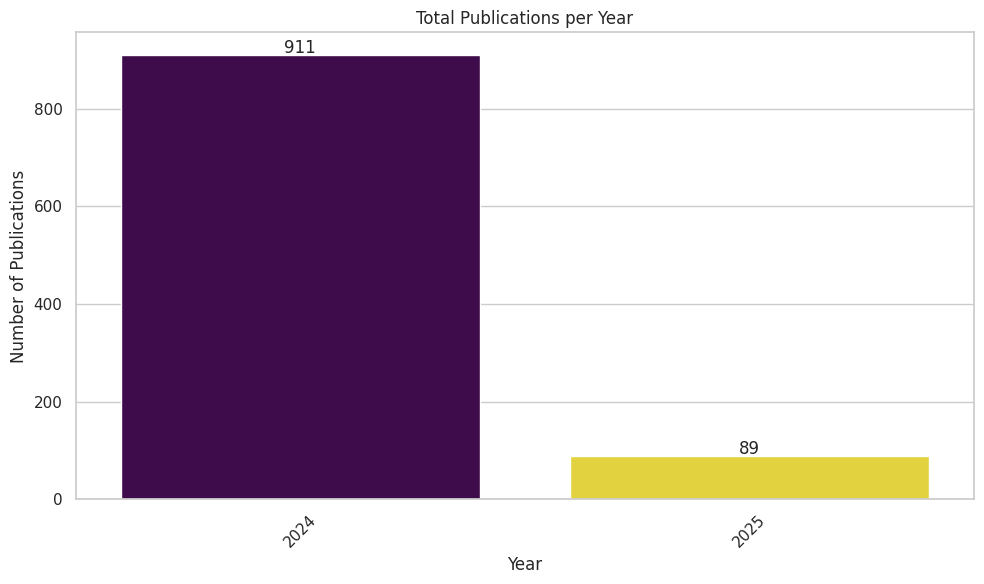


Total Publications per Year (Table):
   Year  Number of Publications
0  2024                     911
1  2025                      89


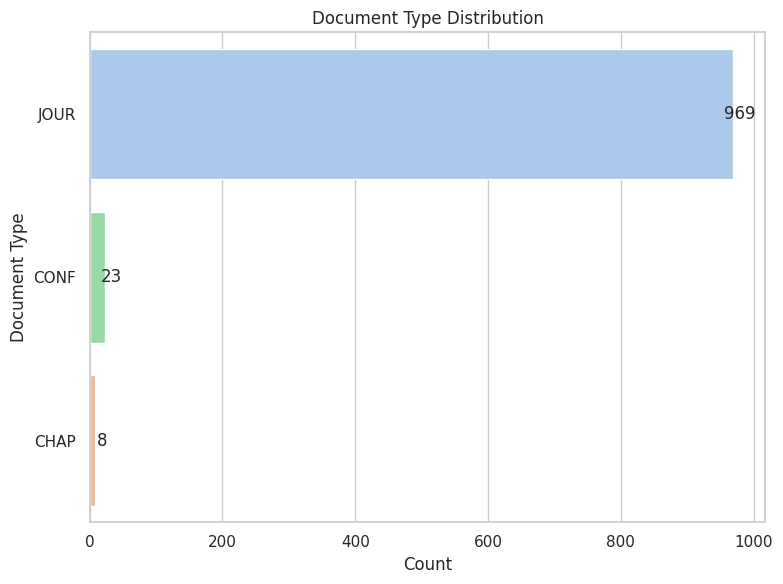

Occurrence of Document Types:
Document_Type
JOUR    969
CONF     23
CHAP      8
Name: count, dtype: int64


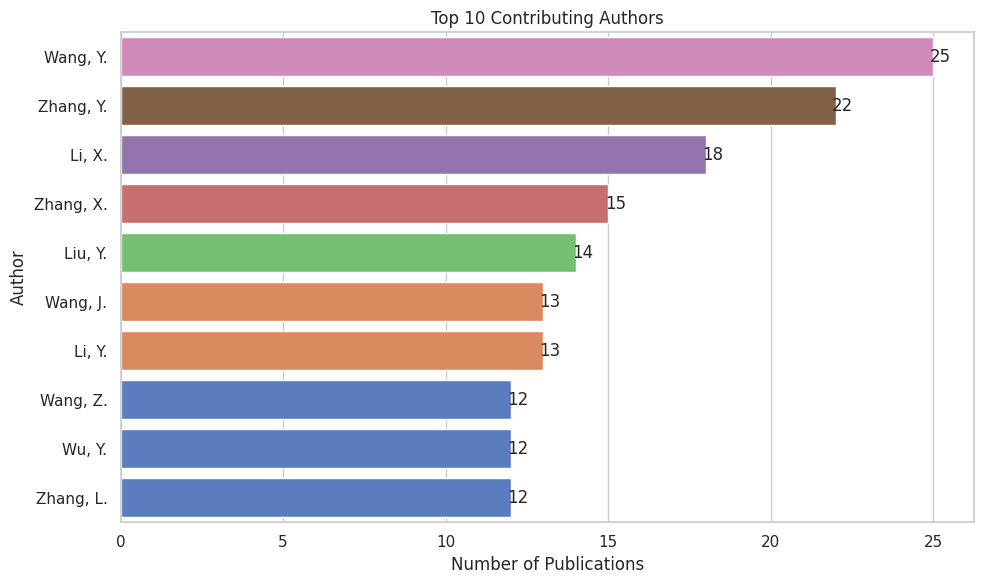


Top 10 Contributing Authors (Full Names):
      Author  Number of Publications
0   Wang, Y.                      25
1  Zhang, Y.                      22
2     Li, X.                      18
3  Zhang, X.                      15
4    Liu, Y.                      14
5   Wang, J.                      13
6     Li, Y.                      13
7   Wang, Z.                      12
8     Wu, Y.                      12
9  Zhang, L.                      12


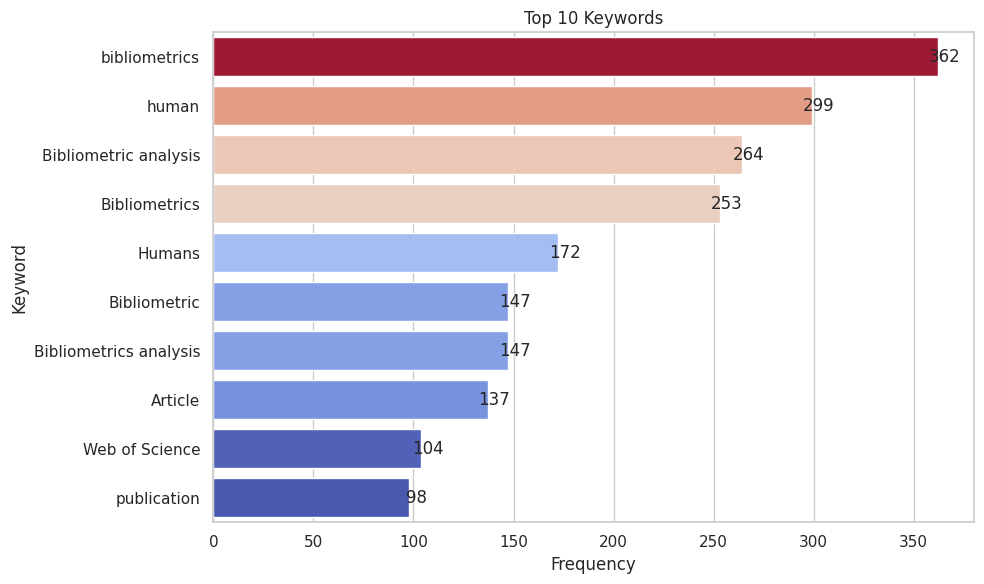


Top 10 Keywords:
                  Keyword  Frequency
0           bibliometrics        362
1                   human        299
2   Bibliometric analysis        264
3           Bibliometrics        253
4                  Humans        172
5            Bibliometric        147
6  Bibliometrics analysis        147
7                 Article        137
8          Web of Science        104
9             publication         98


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rispy

# Load data
file_path = "nonduplicate_data.ris"  # Replace this to the name of your new file

# Initialize lists for structured data
records = []
current_record = {"Author": [], "Title": None, "Year": None, "Document_Type": None, "Keyword": []}

# Read file and parse data
with open(file_path, "r") as file:
    lines = file.readlines()
    for line in lines:
        line = line.strip()
        if line.startswith("AU  -"):
            current_record["Author"].append(line.replace("AU  -", "").strip())
        elif line.startswith("TI  -"):
            current_record["Title"] = line.replace("TI  -", "").strip()
        elif line.startswith("PY  -"):
            current_record["Year"] = line.replace("PY  -", "").strip()
        elif line.startswith("TY  -"):
            current_record["Document_Type"] = line.replace("TY  -", "").strip()
        elif line.startswith("KW  -"):
            current_record["Keyword"].append(line.replace("KW  -", "").strip())
        elif line.startswith("ER  -"):  # End of record indicator
            records.append(current_record.copy())
            current_record = {"Author": [], "Title": None, "Year": None, "Document_Type": None, "Keyword": []}

# Join author list to a single string for each record
for record in records:
    record["Author"] = '; '.join(record["Author"])  # Use '; ' to preserve full names as a single string

for record in records:
    record["Keyword"] = ', '.join(record["Keyword"])

# Create DataFrame
data = pd.DataFrame(records)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# ---- Visualizations ----

sns.set(style="whitegrid")

# 1. Total Publications per Year
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x="Year", hue="Year", palette="viridis", order=sorted(data['Year'].dropna().unique()), legend=False)
plt.title("Total Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Display publications per year in a table
publications_per_year = data['Year'].value_counts().sort_index()
publications_per_year_table = pd.DataFrame({
    "Year": publications_per_year.index,
    "Number of Publications": publications_per_year.values
})
print("\nTotal Publications per Year (Table):")
print(publications_per_year_table)

# 2. Document Type Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, y="Document_Type", hue="Document_Type", palette="pastel", order=data["Document_Type"].value_counts().index, legend=False)
plt.title("Document Type Distribution")
plt.xlabel("Count")
plt.ylabel("Document Type")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

# ---- Occurrence of Document Types ----
document_type_counts = data['Document_Type'].value_counts()

# Display the occurrence counts
print("Occurrence of Document Types:")
print(document_type_counts)

# 3. Top Contributing Authors - Bar Plot
authors = data['Author'].str.split('; ').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=authors.index, x=authors.values, hue=authors.values, palette="muted", legend=False)
plt.title("Top 10 Contributing Authors")
plt.xlabel("Number of Publications")
plt.ylabel("Author")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

# Display the top contributing authors in a table with full names
top_authors_table = pd.DataFrame({
    "Author": authors.index,
    "Number of Publications": authors.values
})
print("\nTop 10 Contributing Authors (Full Names):")
print(top_authors_table)

# ---- Keyword ----

# Check if 'Keyword' column is present, contains data, and remove empty keywords
if 'Keyword' in data.columns:
    keywords = data['Keyword'].dropna()
    keywords = keywords[keywords.str.strip() != ""]

    # Explode keywords into individual words, then count top 10 keywords
    keywords = keywords.str.split(', ').explode().value_counts().head(10)

    # Keyword Bar Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(y=keywords.index, x=keywords.values, hue=keywords.values, palette="coolwarm", legend=False)
    plt.title("Top 10 Keywords")
    plt.xlabel("Frequency")
    plt.ylabel("Keyword")

    # Add annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(5, 0), textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # Display the top keywords in a table
    top_keywords_table = pd.DataFrame({
        "Keyword": keywords.index,
        "Frequency": keywords.values
    })
    print("\nTop 10 Keywords:")
    print(top_keywords_table)

else:
    print("No keywords available for visualization.")


## **VosViewer Cluster Keyword**

This script will help you to count each keyword in the cluster that you have based on the **"Map File"** Vosviewer data.
<br>
Disclaimer: Make sure you already have the VosViewer Data beforehand, if you don't have one, you can follow the following step:
1. Install and open VosViewer on your desktop
2. On the left side, click "Create"
3. Then "Create a map based on text data", then click next
4. "Read data from reference manager file", then click next
5. Search your dataset, then click next
6. Choose the "Fields from which term will be extracted", then click next
7. Choose "Full counting", then next
8. (optional) Then define how many "Minimum number of occurrences of a term", then next
9. (Optional) Then define how many "Number of terms to be selected"
10. (Optional) Review the term that will be selected, if there is a term that you want to exlude, you can uncheck the left checkbox, then click "Finish"
11. After that, click "Save", then browse where the "VosViewer map file" will be saved, and fill the name with **"Map File"**
12. Then you will have the "Map File" that is needed to run the following script

In [4]:
import pandas as pd

# Load the file into a pandas DataFrame
file_path = 'Map File.txt' # Replace this to the name of your new file
df = pd.read_csv(file_path, sep='\t')

# Select relevant columns
df = df[['label', 'cluster', 'weight<Occurrences>']]

# Group by cluster and sort keywords by occurrences within each cluster
clustered_keywords = {}
for _, row in df.iterrows():
    keyword, cluster, occurrences = row['label'], row['cluster'], row['weight<Occurrences>']
    if cluster not in clustered_keywords:
        clustered_keywords[cluster] = []
    clustered_keywords[cluster].append((keyword, occurrences))

# Sort keywords within each cluster by occurrences in descending order
for cluster, keywords in clustered_keywords.items():
    clustered_keywords[cluster] = sorted(keywords, key=lambda x: x[1], reverse=True)

# Print the results
for cluster, keywords in clustered_keywords.items():
    print(f"Cluster {cluster}:")
    print(", ".join([f"{keyword} ({occurrences})" for keyword, occurrences in keywords]))
    print("\n")


Cluster 3:
health (93), machine learning (55), detection (51), deep learning (50), indicator (49), platform (49), synthesis (44), water (42), capacity (36), cost (34), content (33), pollutant (33), link (31), indonesia (30), nanoparticle (29), practical application (29), recovery (28), wastewater (28), art (26), biochar (26), plant (26), combination (25), physical activity (25), alternative (24), asia (24), sensor (24), adsorption (23), soil (23), ability (22), item (22), machine (22), remote sensing (22), accuracy (21), systematic analysis (21), plastic (20), microplastic (19), research publication (19), contaminant (18), extent (18), wastewater treatment (18), wos database (18), google scholar (17), temperature (17), cnki (16), end (16), retraction (16), water resource (16), book (15), medium (15), adverse effect (14), heavy metal (14), human health (14), iii (14), public health (14), future perspective (13), home (13), wide range (13), art therapy (12), cost effectiveness (12), fent